## Extra Credit

Q1: Can you figure out what is the reason for these lower counts (especially at the beginning and end of the year and also the sudden dip at the end of each month)? Is it restricted to a subset of the stations? Suggest a way to remove this effect.

Q2: Can you Explain the counts per day for "SNWD" ?


## Get Raw Data
For TMAX
- <http://mas-dse-open.s3.amazonaws.com/Weather/tmax_all_years.pickle> :
- Cumulative count of non-nan values for every day in the year (similar to NE in the notebook)  grouped by year.

- http://mas-dse-open.s3.amazonaws.com/Weather/tmax_all_stations.pickle>
- Cumulative count of non-nan values for every day in the year (similar to NE in the notebook) grouped by station.

For SNWD:
- http://mas-dse-open.s3.amazonaws.com/Weather/snwd_all_years.pickle
- http://mas-dse-open.s3.amazonaws.com/Weather/snwd_all_stations.pickle

### Q1 TMAX
- First we plot the raw data and the STAT data, then we compare these two figures.
- We can easily find out that these two figures both have dips at nearly same position.
- So we first consider whether it is a subset of the stations' effect that causes dips for all data.

In [26]:
%pylab inline
data_dir = "../../../Data/Weather"

Populating the interactive namespace from numpy and matplotlib


In [7]:
!curl -o $data_dir/tmax_all_years.pickle http://mas-dse-open.s3.amazonaws.com/Weather/tmax_all_years.pickle
!curl -o $data_dir/tmax_all_stations.pickle http://mas-dse-open.s3.amazonaws.com/Weather/tmax_all_stations.pickle 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1926k  100 1926k    0     0   862k      0  0:00:02  0:00:02 --:--:--  863k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  216M  100  216M    0     0  4671k      0  0:00:47  0:00:47 --:--:-- 3784k


In [68]:
import pickle
import numpy as np
tmax_all_station=pickle.load(open(data_dir+'/tmax_all_stations.pickle','r'))
tmax_s = sc.parallelize(tmax_all_station)
list1 = sc.parallelize(tmax_all_station).map(lambda x: x[1]).reduce(lambda x, y: map(add, x, y))
# list2 = sc.parallelize(tmax_all_station).map(lambda x: np.array(x[1])).reduce(lambda x, y: x + y)

In [69]:
tmax_all_year = pickle.load(open(data_dir+'/tmax_all_years.pickle','r'))
tmax_y = sc.parallelize(tmax_all_year)

In [70]:
STAT,STAT_description=pickle.load(open(data_dir+'/STAT.pickle','r'))

In [71]:
def MonthlyPlots(T,ttl='',yl='',xl='',color = '',y=None,x=None):
    yearday=[i for i in range(1,366)]
    linetype = color + '-'
    plot_date(yearday,T,linetype);
    plt.gca().xaxis.set_major_formatter( DateFormatter('%b') )
    ylabel(yl)
    xlabel(xl)
    if y is not None:
        ylim(y)
    if x is not None:
        xlim(x)
    grid()
    title(ttl)

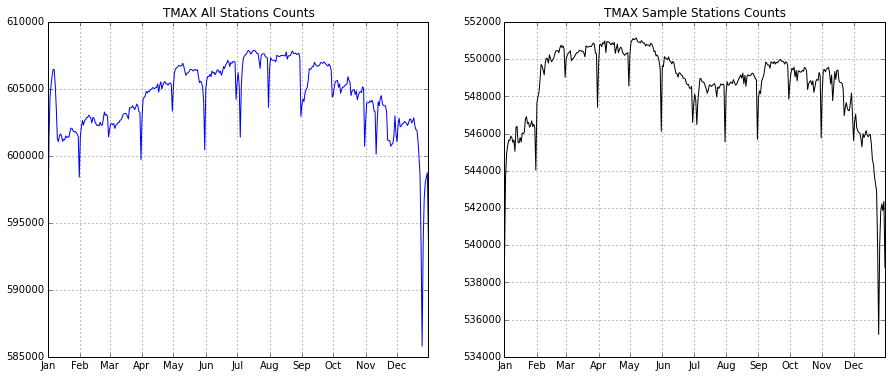

In [72]:
figure(figsize=(15,6))
subplot(1,2,1)
MonthlyPlots(list1)
plt.title('TMAX All Stations Counts')
fig = plt.gcf()
subplot(1,2,2)
NE=STAT['TMAX']['NE'] 
MonthlyPlots(NE,color = 'k')
plt.title('TMAX Sample Stations Counts')
fig = plt.gcf()

### Check stations' effect
- First, we find top 1 lowest dip point for each month among all station's count sum.
- then for each station, we calcualte the count difference between these lowest dip date and 10 days before this date.
- It is like finding which station has the largest decreasing slope at these lowest dip points.
- then we remove these bad stations' all year data, and replot our data.
- we can see the dip effect will be improved.

### Explaination:
- There is a general decrease from Nov to the end of this year, Jan to the beginning of Feb. This can be explained by holiday season. Station workers are on vacation. Also for other holidays, like July 4th the National day, we can easily see a decrease there.
- Nearly for the end of each month, we can see a sudden decrease happens. This can be explained by two reasons: first, maybe for most station, there is a monthly machine repairment at the end of the month, so the count will reduce.
- second, usually at the beginning of each month, people still have passion to work, so the count number will suddenly increase from the end of previous month.However with the month going on, till the end of each month, people usually don't want to work, so the count number will reduce.

### Instructor feedback

The problem might be the poor english. But part of writing an explanation is checking it with other students
to make sure that the explanation is clear and can be understood.

A method is described to remove the count dips over the end of the month. I guess that the graph titled "TMAX Sample Stations Counts" should be better than than the one titled "TMAX All Station Counts", but I don't see a significant improvement.

5 Extra credit points.

## Q2 SNWD
From the plot below, we can see some interesting results:
- There is a general decrease from Nov to the end of this year. This can be explained by holiday season.
- There is a general high count from May to Oct. Maybe because during summer it is easily to measure snow depth because summer seldom snows so that makes the measurment work easier to finish. Therefore the count maintains high.
- There is a sudden decrease at the end of Jan. Maybe Jan there is a lot of snow so at the end of Jan most station has to repair their machines to keep the machines work well.
- There is a sudden increase at the beginning of Feb, March and April, because after the previous month's machine repair most stations will be able to do more measurement at the beginning of the month. Also usually at the beginning of each month, people still have passion to work. With the month going on, till the end of each month, people usually don't want to work and the count number will reduce.
- During summer, we can only see a sudden reduce at the end of July. Because during summer measurement don't need to get repair that often so maybe only at the end of July most stations go to repair their snow measurement machines. 


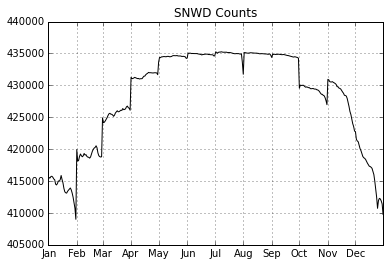

In [105]:
NE=STAT['SNWD']['NE'] 
MonthlyPlots(NE,color = 'k')
plt.title('SNWD Counts')
fig = plt.gcf()